In [37]:
# Scalogram 

In [38]:
import pandas as pd
# Load the uploaded CSV file
file_path = 'stockdata_JMIA.csv'
stock_data = pd.read_csv(file_path)
# Display the first few rows of the data to understand its structure
stock_data

,Symbol,Date,Close Price
0,JMIA,2025-02-24,2.71
1,JMIA,2025-02-21,2.76
2,JMIA,2025-02-20,2.82
3,JMIA,2025-02-19,3.88
4,JMIA,2025-02-18,4.04
...,...,...,...
518,JMIA,2023-01-30,3.98
519,JMIA,2023-01-27,4.28
520,JMIA,2023-01-26,4.06
521,JMIA,2023-01-25,3.94


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


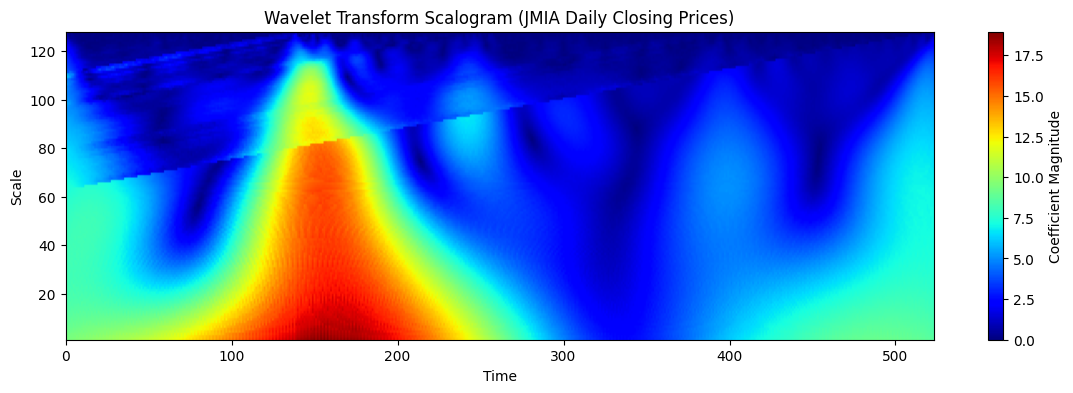

In [39]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
# Convert the Date column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Use only the 'Close Price' column for the wavelet transform
closing_prices = stock_data['Close Price'].values

# Define scales for wavelet transform
scales = np.arange(1, 128)

# Apply Continuous Wavelet Transform (CWT)
coeffs, freqs = pywt.cwt(closing_prices, scales, 'cmor')

# Plot the scalogram
plt.figure(figsize=(14, 4))
plt.imshow(np.abs(coeffs), extent=[0, len(closing_prices), 1, 128], cmap='jet', aspect='auto', 
           vmax=np.abs(coeffs).max(), vmin=0)
plt.title('Wavelet Transform Scalogram (JMIA Daily Closing Prices)')
plt.ylabel('Scale')
plt.xlabel('Time')
plt.colorbar(label='Coefficient Magnitude')
plt.show()

In [40]:
#This helps:
#Identify dominant trends.
#Find significant events or anomalies.
#Detect key market cycles.
#Measuring and Quantifying Features
#A. Wavelet Power Spectrum
#Sum the square of the wavelet coefficients to get the energy distribution.
#Helps identify dominant scales contributing most to signal variation.
#B. Scale-Averaged Wavelet Power
#Compute the average power across scales to highlight dominant periodicities.
#Useful for detecting long-term trends vs short-term fluctuations.
#C. Peak Detection in Coefficients
#Extract local maxima from high-energy wavelet coefficients.
#Useful for detecting sudden price movements or volatility clusters

In [41]:
#Final Thoughts
#Smooth, broad bands = Long-term trends.
#Sharp spikes = Sudden market moves.
#Repeating bright spots = Cyclic behavio

In [42]:
import numpy as np
# Extract key statistics from CWT coefficients
avg_power_per_scale = np.mean(np.abs(coeffs) ** 2, axis=1)  # Average power per scale
dominant_scale = scales[np.argmax(avg_power_per_scale)]  # Scale with max energy
top_events = np.where(np.abs(coeffs) > 0.8 * np.max(np.abs(coeffs)))  # Significant events
print(f"Dominant Scale: {dominant_scale}")
print(f"Top Events (Time, Scale): {list(zip(top_events[1], scales[top_events[0]]))}")

Dominant Scale: 127
Top Events (Time, Scale): [(np.int64(152), np.int64(48)), (np.int64(153), np.int64(48)), (np.int64(155), np.int64(48)), (np.int64(150), np.int64(49)), (np.int64(153), np.int64(49)), (np.int64(156), np.int64(49)), (np.int64(149), np.int64(50)), (np.int64(151), np.int64(50)), (np.int64(152), np.int64(50)), (np.int64(153), np.int64(50)), (np.int64(154), np.int64(50)), (np.int64(155), np.int64(50)), (np.int64(156), np.int64(50)), (np.int64(148), np.int64(51)), (np.int64(149), np.int64(51)), (np.int64(150), np.int64(51)), (np.int64(151), np.int64(51)), (np.int64(152), np.int64(51)), (np.int64(153), np.int64(51)), (np.int64(154), np.int64(51)), (np.int64(155), np.int64(51)), (np.int64(156), np.int64(51)), (np.int64(157), np.int64(51)), (np.int64(158), np.int64(51)), (np.int64(149), np.int64(52)), (np.int64(150), np.int64(52)), (np.int64(151), np.int64(52)), (np.int64(152), np.int64(52)), (np.int64(153), np.int64(52)), (np.int64(154), np.int64(52)), (np.int64(155), np.int6

In [43]:
#Sampling Rate of the Data:
#If data points are daily, then a scale of 100 means ~100 days.
#If data points are hourly, then scale 100 means ~100 hours

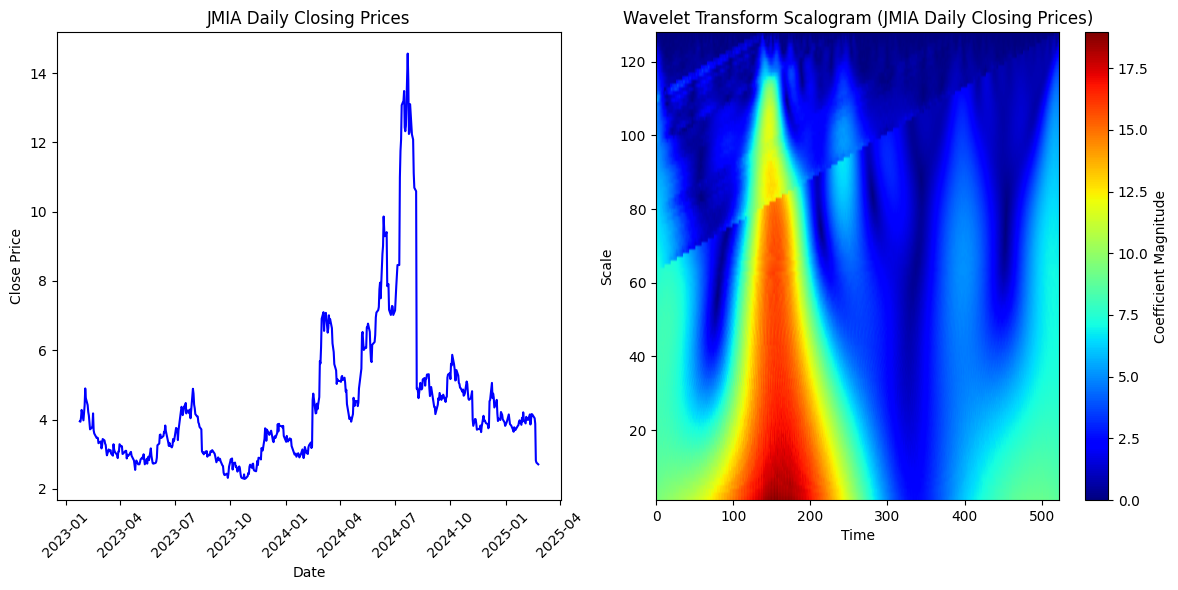

In [44]:
# Plotting the daily closing prices along with the scalogram for comparison
plt.figure(figsize=(12, 6))

# Plot the daily closing prices
plt.subplot(1, 2, 1)
plt.plot(stock_data['Date'],stock_data['Close Price'], color='blue')
plt.title('JMIA Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

# Plot the scalogram for the same time period (using previously computed CWT coefficients)
plt.subplot(1, 2, 2)
closing_prices = stock_data['Close Price'].values
scales = np.arange(1, 128)
coeffs, freqs = pywt.cwt(closing_prices, scales, 'cmor')
plt.imshow(np.abs(coeffs), extent=[0, len(closing_prices), 1, 128], cmap='jet', aspect='auto', 
           vmax=np.abs(coeffs).max(), vmin=0)
plt.title('Wavelet Transform Scalogram (JMIA Daily Closing Prices)')
plt.ylabel('Scale')
plt.xlabel('Time')
plt.colorbar(label='Coefficient Magnitude')
# Show the plots
plt.tight_layout()
plt.show()

In [45]:
import pandas as pd
import numpy as np

# Assuming 'stock_data' has 'Date' and 'Close Price' columns
# Calculate significant events (threshold-based)
threshold = 0.8 * np.max(np.abs(coeffs))  # Threshold for significant wavelet events
significant_events = np.where(np.abs(coeffs) > threshold)

In [ ]:
# The below code is a (Backtesting) strategy with 5% stoploss and 10% Target price.

In [67]:
import pandas as pd
import numpy as np
import pywt

# Parameters for the strategy
stop_loss_pct = 0.05  # Stop-loss at 5%
target_pct = 0.10  # Target price at 10%

# Assuming `stock_data` is your DataFrame with 'Date' and 'Close Price' columns
# Assuming `coeffs` contains the wavelet coefficients and `scales` contains the scale values

# Recalculate significant events from the wavelet transform
threshold = 0.8 * np.max(np.abs(coeffs))  # Define threshold for significant wavelet events
significant_events = np.where(np.abs(coeffs) > threshold)  # Find indices where coefficients exceed the threshold

# Initialize variables
buy_signals = []
sell_signals = []
trade_profits = []
initial_portfolio_value = 7200  # Start with $10,000 for simplicity
current_portfolio_value = initial_portfolio_value
current_position = 0  # Keep track of the stock position (number of shares held)
last_sell_date = None  # Track the last sell date to ensure buy happens only after sell

# Loop through significant events to generate buy and sell signals
for time, scale in zip(significant_events[1], significant_events[0]):
    # Ensure that buy only happens after a previous sell has occurred (single open position)
    if time > 0 and stock_data['Close Price'].iloc[time] > stock_data['Close Price'].iloc[time - 1] and current_position == 0 and (last_sell_date is None or stock_data['Date'].iloc[time] > last_sell_date):
        # Buy signal: Record buy date, price, and wavelet coefficient
        buy_signals.append({
            'Buy Date': stock_data['Date'].iloc[time],
            'Wavelet Signal Coefficient Buy': np.abs(coeffs[scale, time]),
            'Buy Price': stock_data['Close Price'].iloc[time],
            'Portfolio Value at Buy': current_portfolio_value  # Track portfolio value at buy time
        })
        # Calculate number of shares bought with the current portfolio value
        number_of_shares = current_portfolio_value / stock_data['Close Price'].iloc[time]
        current_position = number_of_shares
        initial_buy_price = stock_data['Close Price'].iloc[time]
        last_buy_date = stock_data['Date'].iloc[time]  # Track the last buy date
    
    # Check for sell signal (Stop-loss or Target Price) only if position is open
    elif current_position > 0:
        # Check if stock has hit stop-loss or target price
        current_price = stock_data['Close Price'].iloc[time]
        if current_price <= initial_buy_price * (1 - stop_loss_pct) or current_price >= initial_buy_price * (1 + target_pct):
            # Ensure sell date is after buy date
            if stock_data['Date'].iloc[time] > last_buy_date:
                # Calculate portfolio value after selling
                new_portfolio_value = current_position * current_price
                
                # Calculate profit for this trade
                profit = new_portfolio_value - current_portfolio_value
                profit_pct = (profit / current_portfolio_value) * 100
                
                # Sell signal: Record sell date, price, and wavelet coefficient
                sell_signals.append({
                    'Sell Date': stock_data['Date'].iloc[time],
                    'Wavelet Signal Coefficient Sell': np.abs(coeffs[scale, time]),
                    'Sell Price': current_price
                })
                
                # Record the trade performance
                trade_profits.append({
                    'Profit': profit,
                    'Profit Percentage': profit_pct,
                    'Cumulative Portfolio Value': new_portfolio_value,
                    'Overall Percentage Change': (new_portfolio_value - initial_portfolio_value) / initial_portfolio_value * 100
                })
                
                # Update current portfolio value for next trade
                current_portfolio_value = new_portfolio_value
                
                # Reset position after selling
                last_sell_date = stock_data['Date'].iloc[time]
                current_position = 0  # No position held after selling

# Create DataFrames for buy, sell, and portfolio values
buy_df = pd.DataFrame(buy_signals)
sell_df = pd.DataFrame(sell_signals)
profit_df = pd.DataFrame(trade_profits)

# Create a clean results DataFrame with only the needed columns
results_df = pd.DataFrame()
results_df['Buy Date'] = buy_df['Buy Date']
results_df['Wavelet Signal Coefficient Buy'] = buy_df['Wavelet Signal Coefficient Buy']
results_df['Buy Price'] = buy_df['Buy Price']
results_df['Portfolio Value at Buy'] = buy_df['Portfolio Value at Buy']
results_df['Sell Date'] = sell_df['Sell Date']
results_df['Wavelet Signal Coefficient Sell'] = sell_df['Wavelet Signal Coefficient Sell']
results_df['Sell Price'] = sell_df['Sell Price']
results_df['Profit'] = profit_df['Profit']
results_df['Profit Percentage'] = profit_df['Profit Percentage']
results_df['Cumulative Portfolio Value'] = profit_df['Cumulative Portfolio Value']
results_df['Overall Percentage Change'] = profit_df['Overall Percentage Change']

# Calculate summary statistics
total_profit = results_df['Profit'].sum()
win_count = len(results_df[results_df['Profit'] > 0])
loss_count = len(results_df[results_df['Profit'] <= 0])
win_rate = win_count / len(results_df) * 100 if len(results_df) > 0 else 0
average_profit = results_df['Profit'].mean()
average_profit_pct = results_df['Profit Percentage'].mean()
final_portfolio_value = initial_portfolio_value
if not profit_df.empty:
    final_portfolio_value = profit_df['Cumulative Portfolio Value'].iloc[-1]
total_return_pct = (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value * 100
# Display the results DataFrame
results_df

,Buy Date,Wavelet Signal Coefficient Buy,Buy Price,Portfolio Value at Buy,Sell Date,Wavelet Signal Coefficient Sell,Sell Price,Profit,Profit Percentage,Cumulative Portfolio Value,Overall Percentage Change
0,2023-09-01,15.175443,3.12,7200.000000,2023-09-06,15.190896,2.95,-392.307692,-5.448718,6807.692308,-5.448718
1,2023-09-11,15.334108,2.91,6807.692308,2023-09-18,15.189889,2.68,-538.065028,-7.903780,6269.627280,-12.921843
2,2023-09-25,15.187893,2.44,6269.627280,2023-10-02,15.332651,2.86,1079.198138,17.213115,7348.825418,2.067020
3,2023-10-04,15.192251,2.88,7348.825418,2023-10-05,15.208532,2.56,-816.536158,-11.111111,6532.289261,-9.273760
4,2023-10-06,15.208689,2.73,6532.289261,2023-10-13,15.160943,2.50,-550.339388,-8.424908,5981.949872,-16.917363
5,2023-10-16,15.361585,2.65,5981.949872,2023-10-18,15.275036,2.45,-451.467915,-7.547170,5530.481958,-23.187751
6,2023-10-24,15.179082,2.42,5530.481958,2023-10-25,15.455079,2.29,-297.092006,-5.371901,5233.389952,-27.314028
7,2023-10-26,15.291003,2.30,5233.389952,2023-11-02,15.171013,2.64,773.631558,14.782609,6007.021510,-16.569146
8,2023-11-03,15.210569,2.70,6007.021510,2023-11-09,15.207363,2.56,-311.475189,-5.185185,5695.546320,-20.895190
9,2023-11-14,15.249268,2.64,5695.546320,2023-11-22,15.453968,3.18,1164.998111,20.454545,6860.544431,-4.714661


In [68]:
# Print summary
print("\n===== TRADING STRATEGY RESULTS =====")
print(f"Initial Portfolio Value: ${initial_portfolio_value:,.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:,.2f}")
print(f"Total Profit/Loss: ${total_profit:,.2f}")
print(f"Total Return: {total_return_pct:.2f}%")
print(f"Number of Trades: {len(results_df)}")
print(f"Win Rate: {win_rate:.2f}% ({win_count} wins, {loss_count} losses)")
print(f"Average Profit per Trade: ${average_profit:,.2f} ({average_profit_pct:.2f}%)")
print("====================================\n")


===== TRADING STRATEGY RESULTS =====
Initial Portfolio Value: $7,200.00
Final Portfolio Value: $6,860.54
Total Profit/Loss: $-339.46
Total Return: -4.71%
Number of Trades: 11
Win Rate: 27.27% (3 wins, 7 losses)
Average Profit per Trade: $-33.95 (0.15%)



In [ ]:
###################################################################  ###############################################################

In [ ]:
# The below code uses a threshold for detecting outliers. Nos stoploss and Target Price

In [69]:
import pandas as pd
import numpy as np
import pywt
from datetime import datetime

# Assuming `stock_data` is your DataFrame with 'Date' and 'Close Price' columns
# Assuming `coeffs` contains the wavelet coefficients and `scales` contains the scale values

# Initialize variables
buy_signals = []
sell_signals = []
trade_profits = []
initial_portfolio_value = 7200  # Start with $10,000 for simplicity
current_portfolio_value = initial_portfolio_value
current_position = 0  # Keep track of the stock position (number of shares held)
last_buy_date = None  # Track the last buy date
last_sell_date = None  # Track the last sell date

# Calculate threshold for significant wavelet events
threshold = 0.8 * np.max(np.abs(coeffs))

# Define wavelet-based strategy parameters
buy_threshold = threshold  # Threshold for buy signals
sell_threshold = threshold * 0.9  # Slightly lower threshold for sell signals
required_coefficient_change = -0.05  # Required percentage change in coefficient for signal

# Find significant wavelet events
significant_events = []
for scale in range(coeffs.shape[0]):
    for time in range(coeffs.shape[1]):
        if np.abs(coeffs[scale, time]) > buy_threshold:
            significant_events.append((scale, time, coeffs[scale, time]))

# Sort events by time to process them chronologically
significant_events.sort(key=lambda x: x[1])

# Previous coefficient value for calculating changes
prev_coef_value = None

# Ensure stock_data['Date'] is in datetime format
if not pd.api.types.is_datetime64_any_dtype(stock_data['Date']):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort stock_data by date to ensure chronological order
stock_data = stock_data.sort_values('Date')

# Loop through significant events to generate buy and sell signals
for scale, time, coef_value in significant_events:
    # Skip the first point as we need a previous value to calculate change
    if prev_coef_value is None:
        prev_coef_value = coef_value
        continue
    
    # Calculate coefficient change percentage
    coef_change_pct = (coef_value - prev_coef_value) / abs(prev_coef_value)
    
    # Check if we have enough data points and valid index
    if time <= 0 or time >= len(stock_data):
        prev_coef_value = coef_value
        continue
    
    try:
        current_date = stock_data['Date'].iloc[time]
        current_price = stock_data['Close Price'].iloc[time]
        prev_price = stock_data['Close Price'].iloc[time - 1]
    except IndexError:
        # Skip if index is out of bounds
        prev_coef_value = coef_value
        continue
    
    # Ensure we're working with valid datetime objects
    if not isinstance(current_date, pd.Timestamp):
        try:
            current_date = pd.to_datetime(current_date)
        except:
            prev_coef_value = coef_value
            continue
    
    # BUY SIGNAL: Strong positive coefficient + increasing price + no current position
    if (coef_value > buy_threshold and 
        coef_change_pct > required_coefficient_change and 
        current_position == 0 and
        current_price > prev_price and
        (last_sell_date is None or current_date > last_sell_date)):
        
        # Buy signal: Record buy date, price, and wavelet coefficient
        buy_signals.append({
            'Buy Date': current_date,
            'Wavelet Signal Coefficient Buy': abs(coef_value),
            'Coefficient Change %': coef_change_pct * 100,  # Convert to percentage
            'Buy Price': current_price,
            'Portfolio Value at Buy': current_portfolio_value
        })
        
        # Calculate number of shares bought with the current portfolio value
        number_of_shares = current_portfolio_value / current_price
        current_position = number_of_shares
        last_buy_date = current_date
    
    # SELL SIGNAL: Coefficient crosses below threshold + decreasing price + has position
    elif (abs(coef_value) < sell_threshold and 
          coef_change_pct < -1 * required_coefficient_change and  # Reversed sign for sell
          current_position > 0 and
          current_price < prev_price and
          last_buy_date is not None and  # Ensure we have a buy before selling
          current_date > last_buy_date):  # Ensure sell date is after buy date
        
        # Calculate portfolio value after selling
        new_portfolio_value = current_position * current_price
        
        # Calculate profit for this trade
        profit = new_portfolio_value - current_portfolio_value
        profit_pct = (profit / current_portfolio_value) * 100
        
        # Sell signal: Record sell date, price, and wavelet coefficient
        sell_signals.append({
            'Sell Date': current_date,
            'Wavelet Signal Coefficient Sell': abs(coef_value),
            'Coefficient Change %': coef_change_pct * 100,  # Convert to percentage
            'Sell Price': current_price
        })
        
        # Record the trade performance
        trade_profits.append({
            'Profit': profit,
            'Profit Percentage': profit_pct,
            'Cumulative Portfolio Value': new_portfolio_value,
            'Overall Percentage Change': (new_portfolio_value - initial_portfolio_value) / initial_portfolio_value * 100
        })
        
        # Update current portfolio value for next trade
        current_portfolio_value = new_portfolio_value
        
        # Reset position after selling
        last_sell_date = current_date
        current_position = 0
    
    prev_coef_value = coef_value

# Handle open position at the end of the period
if current_position > 0 and len(stock_data) > 0:
    # Close position at the last available price
    final_price = stock_data['Close Price'].iloc[-1]
    final_date = stock_data['Date'].iloc[-1]
    
    # Calculate final portfolio value
    final_portfolio_value = current_position * final_price
    
    # Calculate profit for the last trade
    profit = final_portfolio_value - current_portfolio_value
    profit_pct = (profit / current_portfolio_value) * 100
    
    # Record the final sell only if we have a previous buy
    if last_buy_date is not None and final_date > last_buy_date:
        sell_signals.append({
            'Sell Date': final_date,
            'Wavelet Signal Coefficient Sell': 0,  # Forced exit
            'Coefficient Change %': 0,  # Forced exit
            'Sell Price': final_price
        })
        
        # Record the trade performance
        trade_profits.append({
            'Profit': profit,
            'Profit Percentage': profit_pct,
            'Cumulative Portfolio Value': final_portfolio_value,
            'Overall Percentage Change': (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value * 100
        })
        
        # Update final portfolio value
        current_portfolio_value = final_portfolio_value

# Create DataFrames
buy_df = pd.DataFrame(buy_signals)
sell_df = pd.DataFrame(sell_signals)
profit_df = pd.DataFrame(trade_profits)

# Ensure we have equal number of buys and sells for proper pairing
min_length = min(len(buy_df), len(sell_df))
buy_df = buy_df.iloc[:min_length]
sell_df = sell_df.iloc[:min_length]
profit_df = profit_df.iloc[:min_length]

# Create a clean results DataFrame with only the needed columns
results_df = pd.DataFrame()

if not buy_df.empty and not sell_df.empty:
    # Validate that buy dates are before corresponding sell dates
    valid_trades = []
    for i in range(min_length):
        if buy_df['Buy Date'].iloc[i] < sell_df['Sell Date'].iloc[i]:
            valid_trades.append(i)
    
    # Keep only valid trades
    if valid_trades:
        buy_df = buy_df.iloc[valid_trades]
        sell_df = sell_df.iloc[valid_trades]
        profit_df = profit_df.iloc[valid_trades]
        
        # Create final dataframe with validated trades
        results_df['Buy Date'] = buy_df['Buy Date']
        results_df['Wavelet Signal Coefficient Buy'] = buy_df['Wavelet Signal Coefficient Buy']
        results_df['Buy Coefficient Change %'] = buy_df['Coefficient Change %']
        results_df['Buy Price'] = buy_df['Buy Price']
        results_df['Portfolio Value at Buy'] = buy_df['Portfolio Value at Buy']
        results_df['Sell Date'] = sell_df['Sell Date']
        results_df['Wavelet Signal Coefficient Sell'] = sell_df['Wavelet Signal Coefficient Sell']
        results_df['Sell Coefficient Change %'] = sell_df['Coefficient Change %']
        results_df['Sell Price'] = sell_df['Sell Price']
        results_df['Profit'] = profit_df['Profit']
        results_df['Profit Percentage'] = profit_df['Profit Percentage']
        results_df['Cumulative Portfolio Value'] = profit_df['Cumulative Portfolio Value']
        results_df['Overall Percentage Change'] = profit_df['Overall Percentage Change']

# Calculate summary statistics
total_profit = results_df['Profit'].sum() if 'Profit' in results_df.columns and not results_df.empty else 0
win_count = len(results_df[results_df['Profit'] > 0]) if 'Profit' in results_df.columns and not results_df.empty else 0
loss_count = len(results_df[results_df['Profit'] <= 0]) if 'Profit' in results_df.columns and not results_df.empty else 0
win_rate = win_count / len(results_df) * 100 if not results_df.empty else 0
average_profit = results_df['Profit'].mean() if 'Profit' in results_df.columns and not results_df.empty else 0
average_profit_pct = results_df['Profit Percentage'].mean() if 'Profit Percentage' in results_df.columns and not results_df.empty else 0
final_portfolio_value = initial_portfolio_value
if not profit_df.empty:
    final_portfolio_value = profit_df['Cumulative Portfolio Value'].iloc[-1]
total_return_pct = (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value * 100

# Display the results DataFrame
results_df
# Save to CSV if necessary
#results_df.to_csv('wavelet_trading_strategy_results.csv', index=False)

,Buy Date,Wavelet Signal Coefficient Buy,Buy Coefficient Change %,Buy Price,Portfolio Value at Buy,Sell Date,Wavelet Signal Coefficient Sell,Sell Coefficient Change %,Sell Price,Profit,Profit Percentage,Cumulative Portfolio Value,Overall Percentage Change
0,2023-07-26,17.01977,1.283474+0.472769j,4.29,7200,2025-02-24,0,0,2.71,-2651.748252,-36.829837,4548.251748,-36.829837


In [70]:
# Optional: Print signals that were generated but didn't make it into valid trades
print("\nNumber of buy signals generated:", len(buy_signals))
print("Number of sell signals generated:", len(sell_signals))
print("Number of valid trades (buy date before sell date):", len(results_df))


Number of buy signals generated: 1
Number of sell signals generated: 1
Number of valid trades (buy date before sell date): 1


In [71]:
# Print summary
print("\n===== WAVELET-BASED TRADING STRATEGY RESULTS =====")
print(f"Initial Portfolio Value: ${initial_portfolio_value:,.2f}")
print(f"Final Portfolio Value: ${final_portfolio_value:,.2f}")
print(f"Total Profit/Loss: ${total_profit:,.2f}")
print(f"Total Return: {total_return_pct:.2f}%")
print(f"Number of Trades: {len(results_df)}")
print(f"Win Rate: {win_rate:.2f}% ({win_count} wins, {loss_count} losses)")
print(f"Average Profit per Trade: ${average_profit:,.2f} ({average_profit_pct:.2f}%)")
print("================================================\n")


===== WAVELET-BASED TRADING STRATEGY RESULTS =====
Initial Portfolio Value: $7,200.00
Final Portfolio Value: $4,548.25
Total Profit/Loss: $-2,651.75
Total Return: -36.83%
Number of Trades: 1
Win Rate: 0.00% (0 wins, 1 losses)
Average Profit per Trade: $-2,651.75 (-36.83%)



In [ ]:
#############################################################33 The End ########################################################################